# Example of hold-out approach

Example adapted from the official documentation

Author: Umberto Michelucci, TOELT LLC

In [89]:
# matplotlib is a library to plot all sort of data
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In ```scikit-learn``` there are several datasets available for trying out features. They are in the package ```datasets```. In this example we load the digits dataset. That is a low-resolution version of the MNIST dataset.

# The Digits Dataset

The dataset obtained from the `datasets.load_digits()` function in scikit-learn is a collection of hand-written digits, commonly used for practicing classification algorithms, particularly in the field of machine learning for image recognition. Here's a detailed description:

### Overview of the Digits Dataset
1. **Content**:
   - The dataset contains 1,797 images of hand-written digits (0 through 9).
   - Each image is a grayscale bitmap of 8x8 pixels, which means every image is represented as a 64-dimensional vector of pixel intensities.

2. **Target Variable**:
   - The target associated with each image is a digit from 0 to 9, indicating the actual number that the hand-written digit represents.

3. **Usage**:
   - It's primarily used for classification tasks, where the goal is to correctly identify the digit in each image.
   - Suitable for practicing techniques in image processing, machine learning classification algorithms, and pattern recognition.

### Loading the Dataset
- The dataset can be loaded using the `load_digits()` function:
  ```python
  from sklearn import datasets
  digits = datasets.load_digits()
  ```

### Key Features
1. **Data Attributes**:
   - `images`: The actual pixel data of the digits images. Each element is a 2D array of 8x8, representing an image.
   - `data`: The `images` array flattened into a 1D array of 64 pixel values, suitable for use with standard classifiers.
   - `target`: The label for each image. A number indicating the hand-written digit (0-9) the image represents.
   - `target_names`: An array of digits, from 0 to 9, representing the possible digits.

2. **Visualization**:
   - Images can be visualized using matplotlib or similar libraries in Python, which is often helpful for understanding the nature of the data.

3. **Preprocessing**:
   - While the dataset is relatively clean and preprocessed, standard machine learning practices like normalization or scaling pixel values can be applied.

### Example Code
```python
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

# Display the first digit
plt.figure(figsize=(2, 2))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

print('Target label:', digits.target[0])
```

### Applications and Challenges
- **Educational Tool**: It's an excellent dataset for educational purposes, especially for beginners to learn image classification.
- **Benchmarking**: Often used to benchmark performance of various classification algorithms.
- **Challenges**: While the dataset is relatively simple compared to real-world image datasets, it can be used to tackle challenges like image noise reduction, feature extraction, and multi-class classification.



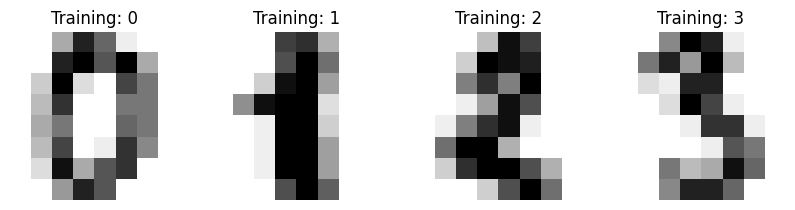

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## The ```shape``` property of a numpy array

The `shape` property of a NumPy array is a fundamental attribute that gives a tuple representing the dimensions (size along each axis) of the array. Understanding and using the `shape` property is crucial in many aspects of data manipulation and analysis in Python, especially when working with arrays and performing mathematical operations. Here's a detailed description:

### Overview of `shape` Property in NumPy Arrays
1. **Definition**:
   - The `shape` property returns a tuple of integers indicating the size of the array in each dimension.

2. **Structure**:
   - For a 1D array, `shape` returns a tuple with a single element, indicating the number of elements in the array (length of the array).
   - For a 2D array (matrix), `shape` returns a tuple with two elements. The first is the number of rows, and the second is the number of columns.
   - Similarly, for higher-dimensional arrays, `shape` extends to more elements, each representing the size of the array along a particular axis.

### Usage and Examples
1. **1D Array (Vector)**:
   ```python
   import numpy as np
   a = np.array([1, 2, 3, 4, 5])
   print(a.shape)  # Output: (5,)
   ```
   - This indicates the array `a` has 5 elements.

2. **2D Array (Matrix)**:
   ```python
   b = np.array([[1, 2, 3], [4, 5, 6]])
   print(b.shape)  # Output: (2, 3)
   ```
   - Here, `b` is a 2x3 matrix (2 rows and 3 columns).

3. **Higher Dimensions**:
   ```python
   c = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
   print(c.shape)  # Output: (2, 2, 2)
   ```
   - `c` is a 3D array with 2 layers, each containing 2 rows and 2 columns.

### Importance in Data Analysis and Manipulation
- **Reshaping Arrays**: Understanding the current shape of an array is critical when reshaping it (e.g., when using `np.reshape`).
- **Compatibility Checks**: In operations involving multiple arrays (like matrix multiplication), ensuring compatible shapes is essential.
- **Dimensionality Insight**: It provides immediate insight into the number of dimensions and the size along each dimension of the array.

In [3]:
digits.images.shape

(1797, 8, 8)

In [6]:
# We check the datatype of digits.images
type(digits.images)

numpy.ndarray

# Data Preparation

In this example, we will use a support vector classifier. This kind of model does not understand 2D data structures (as images are), and thus we need to flatten the images. The original dataset are ```8x8``` in size. 

In [6]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [7]:
data.shape

(1797, 64)

after flattening the 2D image has been converted to a one-dimensional vector with 64 elements (8x8).

# Train the model

In the next cell you can see a good example of the **hold-out** approach to model validation. You will learn more about it in one of the next lectures.

In [60]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
# This is an example of the hold-out approach for
# model validation.
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)


SVC(gamma=0.001)

In [61]:
y_train.shape

(898,)

After splitting the datasets we now have two: a train and a test portion. We can easily check their shapes.

In [62]:
print("Train set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

Train set shape:  (898, 64)
Test set shape:  (899, 64)


# Evaluate the model on the test dataset

In [63]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
predicted_train = clf.predict(X_train)

# Show the prediction visually

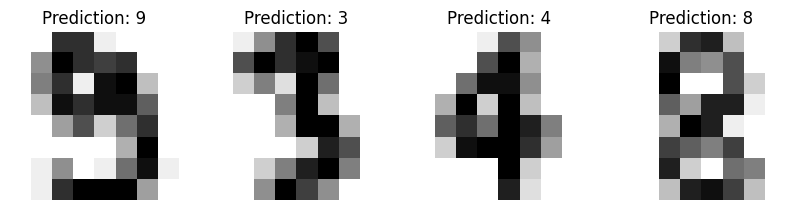

In [64]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Other useful features of ```scikit-learn```

## The ```classification_report()``` Function

`classification_report()` is a function in scikit-learn, a popular Python library for machine learning. It is used to evaluate the quality of predictions from a classification algorithm. Here's a detailed description:

### Overview of `classification_report()`
1. **Purpose**:
   - The `classification_report()` function computes and presents key metrics that are essential for evaluating the performance of a classification model.

2. **Functionality**:
   - It generates a report showing the main classification metrics, including precision, recall, f1-score, and support for each class.

### Key Features and Metrics
1. **Syntax**:
   ```python
   from sklearn.metrics import classification_report
   report = classification_report(y_true, y_pred, labels=None, target_names=None, ...)
   ```
   - `y_true`: True labels of the data.
   - `y_pred`: Predicted labels by the classifier.
   - `labels`: Optional list of label indices to include in the report.
   - `target_names`: Optional display names matching the labels (classes).

2. **Metrics Explained**:
   - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It's a measure of a classifier's exactness.
   - **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all observations in the actual class. It's a measure of a classifier's completeness.
   - **F1 Score**: The weighted average of Precision and Recall. It balances between precision and recall.
   - **Support**: The number of actual occurrences of the class in the specified dataset.

3. **Usage**:
   - Commonly used in classification tasks to assess the strengths and weaknesses of a classification model.
   - Particularly useful in cases where you are dealing with imbalanced datasets.

### Example Usage
```python
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))
```

### Considerations
- **Imbalanced Data**: In cases of imbalanced data, looking at precision and recall becomes more critical than just accuracy.
- **Micro vs. Macro Averages**: For multi-class classification, understanding micro, macro, and weighted averages can provide more insight, especially in imbalanced datasets.


In [65]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.96      1.00      0.98        88
           2       0.99      1.00      0.99        91
           3       1.00      0.94      0.97        99
           4       0.99      0.96      0.97        74
           5       0.96      0.98      0.97        89
           6       0.99      1.00      0.99        93
           7       0.94      1.00      0.97        83
           8       0.97      0.95      0.96        92
           9       0.99      0.97      0.98       100

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899




In [66]:
metrics.accuracy_score(y_test, predicted)

0.9777530589543938

In [67]:
metrics.accuracy_score(y_train, predicted_train)

0.9977728285077951

Confusion matrix:
[[89  0  0  0  1  0  0  0  0  0]
 [ 0 88  0  0  0  0  0  0  0  0]
 [ 0  0 91  0  0  0  0  0  0  0]
 [ 0  0  1 93  0  2  0  1  2  0]
 [ 0  0  0  0 71  0  0  3  0  0]
 [ 0  0  0  0  0 87  1  0  0  1]
 [ 0  0  0  0  0  0 93  0  0  0]
 [ 0  0  0  0  0  0  0 83  0  0]
 [ 0  4  0  0  0  1  0  0 87  0]
 [ 0  0  0  0  0  1  0  1  1 97]]


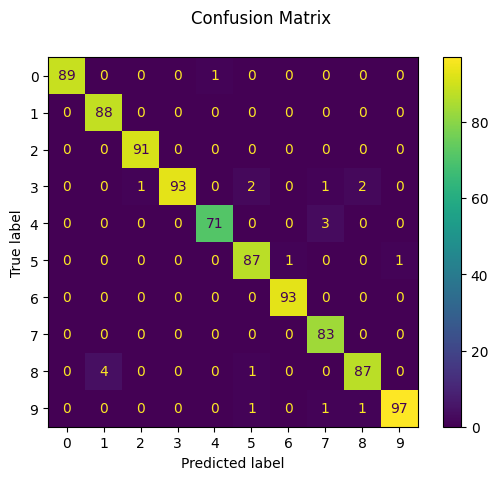

In [68]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Monte-Carlo Cross-Validation

Monte Carlo validation, also known as Monte Carlo cross-validation or simply Monte Carlo simulation in the context of model validation, is a technique used in machine learning and statistics to estimate the performance of a model. It involves running simulations repeatedly to generate random samples and compute the aggregate performance of the model across these simulations. 

### Overview of Monte Carlo Validation
1. **Basic Concept**:
   - Monte Carlo validation is based on the principle of repeated random sampling to obtain a distribution of an unknown probabilistic entity.
   - In model validation, it involves repeatedly selecting random subsets of the data (both training and validation sets) and evaluating the model's performance over these subsets.

2. **Process**:
   - A dataset is split into training and testing sets multiple times, randomly each time. The model is trained and evaluated on each split.
   - This process is repeated a large number of times, and the results are averaged to give an overall performance measure.

### Key Characteristics
1. **Random Sampling**:
   - Each iteration involves randomly selecting a subset of data points for training and a subset for validation/testing.
   - The selection is typically done with replacement, meaning the same data point can appear in multiple samples.

2. **Performance Metrics**:
   - After each iteration, performance metrics (like accuracy, precision, recall, F1-score, etc.) are calculated.
   - These metrics are collected across all iterations to form a distribution.

3. **Aggregation of Results**:
   - The final model performance is typically the mean of the performance metrics across all iterations, though other statistics like median or mode can also be used.
   - The variability or standard deviation of the performance metrics can also provide insights into the model's stability.

### Advantages
- **Reduces Bias and Variance**: Helps in understanding the variability and stability of the model.
- **Flexibility**: Can be used for various types of models and metrics.
- **Effectiveness in Small Datasets**: Particularly useful when the dataset is small, as it allows for more exhaustive exploitation of the available data.

### Considerations
- **Computational Cost**: Can be computationally expensive due to the large number of repetitions.
- **Randomness**: The results can be influenced by the randomness of the sampling process.
- **Choice of Parameters**: The number of iterations and the size of the subsets are important parameters that can affect the results.


In [97]:
accuracy_list = []
gamma_list = [0.01,0.0018, 0.004]
# Create a classifier: a support vector classifier


# Split data into 50% train and 50% test subsets
# This is an example of the hold-out approach for
# model validation.
for g in gamma_list:
    for i in range(500):

        if (i%50==0):
            print('Iteration', i)
        #clf = svm.SVC(gamma=0.002)
        clf = svm.SVC(gamma=g)

        X_train, X_test, y_train, y_test = train_test_split(
            data, digits.target, test_size=0.6, shuffle=True, random_state=i
        )


        # Learn the digits on the train subset
        clf.fit(X_train, y_train)

        predicted = clf.predict(X_test)

    accuracy_list.append(metrics.accuracy_score(y_test, predicted))



Iteration 0
Iteration 50
Iteration 100
Iteration 150
Iteration 200
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Iteration 450
Iteration 0
Iteration 50
Iteration 100
Iteration 150
Iteration 200
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Iteration 450
Iteration 0
Iteration 50
Iteration 100
Iteration 150
Iteration 200
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Iteration 450


In [90]:
for i in range(len(gamma_list)):
    print(gamma_list[i])
    print(np.mean(accuracy_list[i]))

0.01
0.5912882298424467
0.0018
0.4680259499536608
0.004
0.6107506950880445


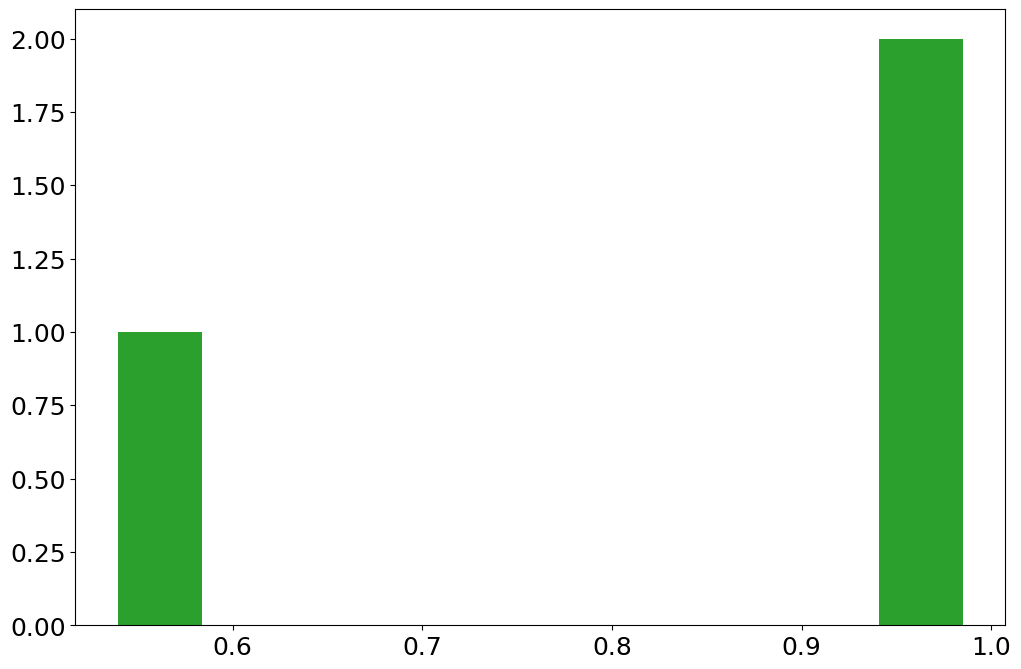

In [98]:
fig = plt.figure(figsize = (12,8))

for i in range(len(gamma_list)):
    plt.hist(accuracy_list, bins = 10)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()